[View in Colaboratory](https://colab.research.google.com/github/kaustubholpadkar/Linear_Regression-Gradient_Descent-Octave/blob/master/Linear_Regression_Python.ipynb)

# Linear Regression
## Predicting Student's marks from Study Hours

### Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [0]:
data = np.genfromtxt('https://raw.githubusercontent.com/mk-gurucharan/Linear-Regression/master/data.csv', delimiter=',')

In [0]:
data.shape

(100, 2)

### Seperate Data into X and Y

In [0]:
X = data[:, 0]
Y = data[:, 1]

### Visualize the Data

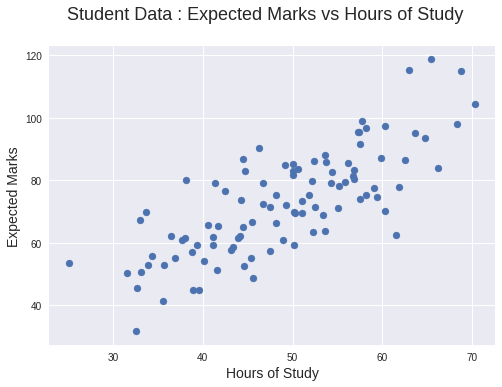

In [0]:
fig = plt.figure()
plt.scatter(X, Y)
fig.suptitle('Student Data : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()

### Hyperparameters

In [0]:
learning_rate = 0.0001
max_iteration = 50

### Parameters

In [0]:
m = 0
b = 0

### Hypothesis

In [0]:
def h (m, b, X) :
  return m * X + b

### Loss Function

In [0]:
def loss (m, b, X, Y) :
  return np.average(np.square(Y - h(m, b, X))) / 2

### Calculate Gradients

In [0]:
def gradient (m, b, X, Y) :
  dm = - np.average((Y - h(m, b, X)) * X)
  db = - np.average(Y - h(m, b, X))
  return (dm, db)

### Gradient Descent

In [0]:
def gradient_descent (m, b, X, Y, learning_rate, max_iteration) :
  for i in range(max_iteration) :
    dm, db = gradient (m, b, X, Y)
    m -= learning_rate * dm
    b -= learning_rate * db
    if i % 10 == 0 :
      print ('iteration : ', i, ' loss : ', loss(m, b, X, Y)) 
  return (m, b)

### Train Model

In [0]:
m, b = gradient_descent (m, b, X, Y, learning_rate, max_iteration)

iteration :  0  loss :  1593.1334591670338
iteration :  10  loss :  61.30482288585254
iteration :  20  loss :  56.34127863702311
iteration :  30  loss :  56.32510567688097
iteration :  40  loss :  56.324963270541446


### Optimal values of Parameters using Trained Model

In [0]:
m, b

(1.4788903781318357, 0.030569950649287976)

### Linear Regression using *polyfit*  function of **numpy**

In [0]:
np_m, np_b = np.polyfit(X, Y, 1)

### Optimal values of Parameters using Numpy Linear Regression

In [0]:
np_m, np_b

(1.32243102275536, 7.991020982270385)

### Visualize the Data

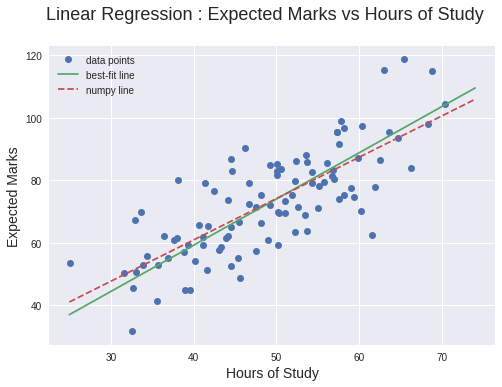

In [0]:
fig = plt.figure()

# Generate data for plotting Line
x = np.arange(25, 75)
y = [m * x_i + b for x_i in x]

# Generate data for plotting Line Numpy Linear Regression
np_x = np.arange(25, 75)
np_y = [np_m * x_i + np_b for x_i in np_x]

# plot data and best-fit lines
plt.plot(X, Y, 'o', x, y, '-', np_x, np_y, '--')
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

fig.suptitle('Linear Regression : Expected Marks vs Hours of Study', fontsize=18)
plt.xlabel('Hours of Study', fontsize=14)
plt.ylabel('Expected Marks', fontsize=14)
plt.show()